<a href="https://colab.research.google.com/github/fboldt/aulasml/blob/master/aula3a_multiclasse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_wine
dataset = load_wine()
X, y = dataset.data, dataset.target
X.shape, y.shape

((178, 13), (178,))

In [2]:
set(y)

{0, 1, 2}

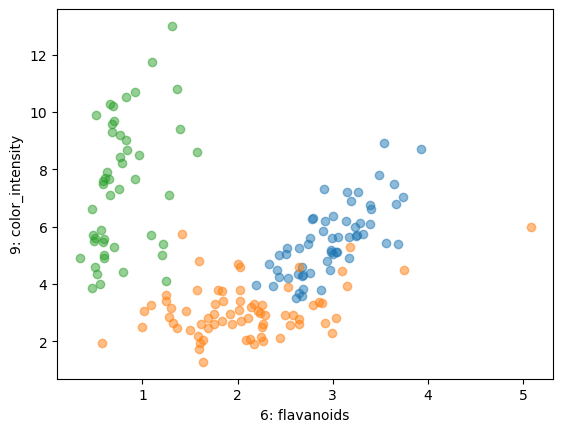

In [3]:
import matplotlib.pyplot as plt
i, j = 6, 9
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
for k in set(y):
  plt.plot(X[:,i][y==k], X[:,j][y==k], "o", alpha=0.5)
plt.show()

In [4]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
class knn(BaseEstimator, ClassifierMixin):
  def fit(self, X, y):
    self.X = X
    self.y = y
  def distancia(self, x):
    diferenca = self.X - x
    quadrado = diferenca**2
    soma = np.sum(quadrado, axis=1)
    raiz = np.sqrt(soma)
    return raiz
  def predict(self, X):
    ypred = np.empty((X.shape[0],))
    for i in range(X.shape[0]):
      distancias = self.distancia(X[i])
      vizinho = np.argmin((distancias))
      ypred[i] = self.y[vizinho]
    return ypred


In [5]:
from sklearn.metrics import accuracy_score
modelo = knn()
modelo.fit(X, y)
accuracy_score(y, modelo.predict(X))

1.0

In [6]:
from sklearn.model_selection import cross_validate
cross_validate(knn(), X, y)

{'fit_time': array([1.26361847e-04, 9.46521759e-05, 1.18732452e-04, 9.01222229e-05,
        1.11103058e-04]),
 'score_time': array([0.00230789, 0.00247359, 0.00281906, 0.00213909, 0.00283766]),
 'test_score': array([0.80555556, 0.63888889, 0.66666667, 0.68571429, 0.82857143])}

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.3)
modelo = knn()
modelo.fit(Xtr, ytr)
ypred = modelo.predict(Xte)
confusion_matrix(yte, ypred)

array([[15,  2,  0],
       [ 1, 18,  5],
       [ 2,  5,  6]])

In [8]:
from sklearn.metrics import f1_score
f1_score(yte, ypred, average="macro")

0.6972789115646258

In [9]:
sum(y==0), sum(y==1), sum(y==2)

(59, 71, 48)

In [10]:
cross_validate(knn(), X, y, scoring="f1_macro")

{'fit_time': array([0.00017476, 0.00030065, 0.00010252, 0.00014305, 0.00010705]),
 'score_time': array([0.00466585, 0.00457144, 0.00416493, 0.00490832, 0.003618  ]),
 'test_score': array([0.80371184, 0.63163031, 0.65010893, 0.67301587, 0.80277778])}

In [11]:
cross_validate(knn(), X, y, scoring=['precision_macro', 'recall_macro'])

{'fit_time': array([0.00014591, 0.00015736, 0.0001018 , 0.00015998, 0.00010252]),
 'score_time': array([0.00759006, 0.0068531 , 0.00703502, 0.00647068, 0.00786352]),
 'test_precision_macro': array([0.8022533 , 0.64814815, 0.7       , 0.74603175, 0.80903541]),
 'test_recall_macro': array([0.81031746, 0.64444444, 0.64126984, 0.65608466, 0.80740741])}

In [12]:
from sklearn.model_selection import RepeatedStratifiedKFold
cross_validate(knn(), X, y, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'],
               cv=RepeatedStratifiedKFold())

{'fit_time': array([1.45673752e-04, 1.45673752e-04, 1.50442123e-04, 1.72376633e-04,
        1.02519989e-04, 1.09195709e-04, 2.07185745e-04, 1.63316727e-04,
        1.06096268e-04, 1.10149384e-04, 1.02758408e-04, 1.94549561e-04,
        1.03473663e-04, 1.05619431e-04, 1.03235245e-04, 1.45673752e-04,
        1.38044357e-04, 1.01089478e-04, 9.15527344e-05, 9.22679901e-05,
        9.27448273e-05, 9.63211060e-05, 9.67979431e-05, 8.17775726e-05,
        9.05990601e-05, 7.98702240e-05, 1.09195709e-04, 9.22679901e-05,
        9.36985016e-05, 8.94069672e-05, 9.39369202e-05, 8.72612000e-05,
        9.39369202e-05, 8.34465027e-05, 8.55922699e-05, 9.03606415e-05,
        8.51154327e-05, 8.48770142e-05, 9.17911530e-05, 1.01327896e-04,
        1.21355057e-04, 8.86917114e-05, 1.01804733e-04, 9.44137573e-05,
        1.07526779e-04, 8.03470612e-05, 9.53674316e-05, 8.27312469e-05,
        9.22679901e-05, 8.74996185e-05]),
 'score_time': array([0.01354599, 0.01385093, 0.01286292, 0.01258492, 0.00978565,


In [13]:
from sklearn.linear_model import Perceptron
modelos = cross_validate(Perceptron(), X, y,
                        cv=RepeatedStratifiedKFold(random_state=42),
                        return_estimator=True)
modelo = modelos['estimator'][0]
modelo, sum(modelos['test_score'])/50

(Perceptron(), 0.572936507936508)

In [14]:
modelo.intercept_

array([-105.,  114.,   19.])

In [15]:
modelo.coef_[:,[6,9]]

array([[  109.82    ,  -490.499995],
       [  416.45    , -1222.54999 ],
       [ -339.16    ,   929.879991]])

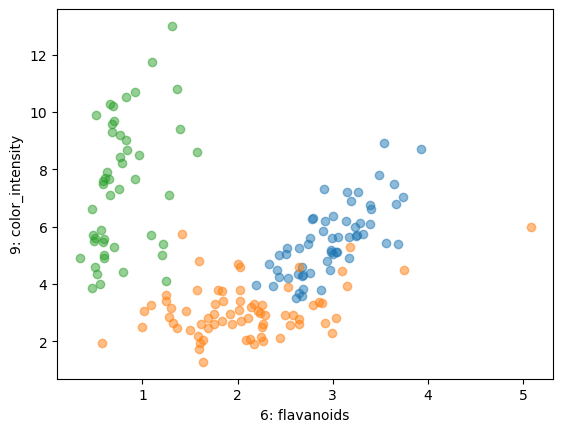

In [16]:
i, j = 6, 9
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
for k in set(y):
  plt.plot(X[:,i][y==k], X[:,j][y==k], "o", alpha=0.5)

plt.show()

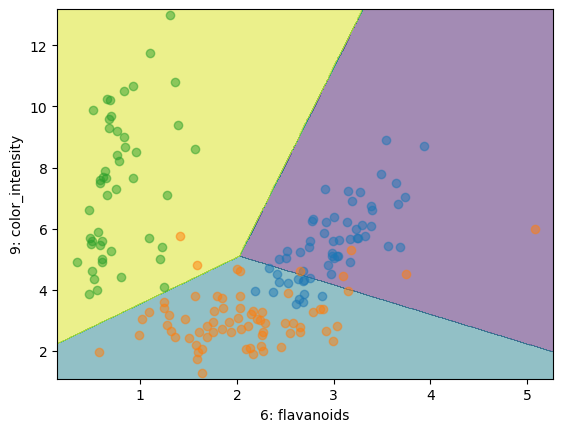

In [40]:
import numpy as np
import matplotlib.pyplot as plt

X_subset = X[:, [i, j]]
modelo.fit(X_subset, y)

# limites
x_min, x_max = X_subset[:, 0].min() - 0.2, X_subset[:, 0].max() + 0.2
y_min, y_max = X_subset[:, 1].min() - 0.2, X_subset[:, 1].max() + 0.2

x0, x1 = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

ypred = modelo.predict(np.c_[x0.ravel(), x1.ravel()])

# pontos
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
for k in set(y):
    plt.plot(X[:,i][y==k], X[:,j][y==k], "o", alpha=0.5)

# hiperplanos
plt.contourf(x0, x1, ypred.reshape(x0.shape), alpha=0.5)
plt.show()